In [14]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
# hdfc_bank = get_history(symbol='HDFCBANK',
#                    start=date(2000,1,1),
#                    end=date(2019,8,27))
# hdfc_bank.to_csv("hdfc_bank_daily_price_movement.csv")

hdfc_bank = pd.read_csv(filepath_or_buffer="HDFCBANK.NS.csv", 
                        index_col='Date',
                        parse_dates=True
                       )
hdfc_bank.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-22,2220.850098,2220.850098,2167.050049,2174.100098,2174.100098,3498011.0
2019-08-23,2161.000000,2177.000000,2139.600098,2162.699951,2162.699951,5024904.0
2019-08-26,2194.899902,2266.149902,2167.000000,2256.149902,2256.149902,6320061.0
2019-08-27,2256.000000,2272.899902,2240.100098,2259.949951,2259.949951,5165208.0
2019-08-28,2250.000000,2257.350098,2226.350098,2247.500000,2247.500000,3415647.0


In [3]:
hdfc_bank.index

DatetimeIndex(['2000-08-29', '2000-08-30', '2000-08-31', '2000-09-01',
               '2000-09-04', '2000-09-05', '2000-09-06', '2000-09-07',
               '2000-09-08', '2000-09-11',
               ...
               '2019-08-14', '2019-08-16', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26',
               '2019-08-27', '2019-08-28'],
              dtype='datetime64[ns]', name='Date', length=4755, freq=None)

In [65]:
wkly = hdfc_bank.resample('W').mean()

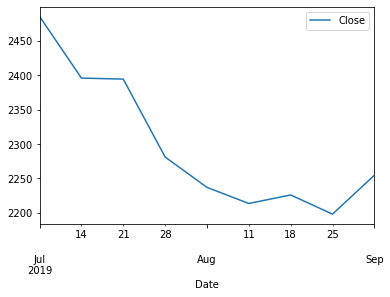

In [20]:
wkly['2019-7':].plot(y='Close')

## Additive Decomposition

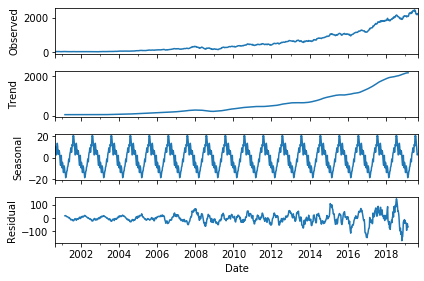

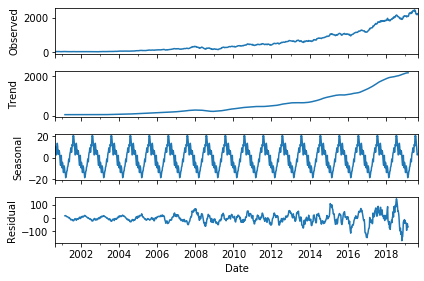

In [6]:
dcmp = seasonal_decompose(wkly.Close )
dcmp.plot()

## Identifying Trends in Time Series
    - Rolling Method and ADCF

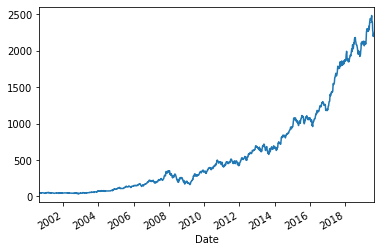

In [12]:
hdfc_bank.Close.rolling(5).mean().plot()

## Augmented Dickey-Fuller test

In [13]:
result = adfuller(wkly.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.499804
p-value: 1.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Making Time Series Stationary

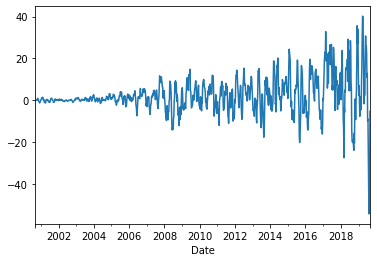

In [70]:
diff = wkly['Close'] - wkly['Close'].shift(1)
diff = diff.dropna() #.plot()
diff = pd.DataFrame(diff)
diff.Close.rolling(5).mean().plot()

In [71]:
result = adfuller(diff.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.720937
p-value: 0.000000
Critical Values:


In [73]:
model = ARIMA(diff.Close, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  990
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4222.516
Method:                       css-mle   S.D. of innovations             17.165
Date:                Thu, 29 Aug 2019   AIC                           8455.033
Time:                        13:33:55   BIC                           8479.521
Sample:                    09-17-2000   HQIC                          8464.345
                         - 09-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0067      0.002      3.067      0.002       0.002       0.011
ar.L1.D.Close     0.0942      0.032      2.951      0.003       0.032       0.157
ar.L2.D.Close     0.0337      0.032     